<a href="https://colab.research.google.com/github/GustavoCruzzz/TrabalhoFinal_DeepLearning_TomorrowUfba/blob/main/TrabalhoFinal_DP_Tomorrow_UFBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ucimlrepo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importação de bibliotecas necessárias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
##Baixando os dados
#Codigo disponibilizado no https://archive.ics.uci.edu/dataset/73/mushroom
# =============================================================
# 1. CARREGAMENTO E PREPARAÇÃO DOS DADOS
# =============================================================
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

#dataframe
mushroom_df = mushroom.data.original


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
#1. Examinando os dados
#mushroom.data

mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [ ]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [ ]:
#verificar se existem valores NAN no dataframe
any_nan = mushroom_df.isna().any().any()
print(f"Há algum NaN no DataFrame? {any_nan}")

Há algum NaN no DataFrame? True


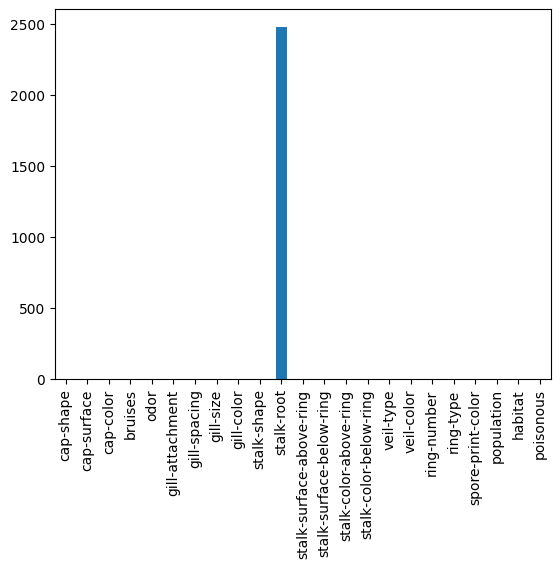

In [ ]:
import matplotlib.pyplot as plt

# Verificando a coluna com valores null
mushroom_df.isnull().sum().plot(kind='bar')
plt.show()


In [ ]:
## Verificando valores nulos e em branco
def unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

missingvalue = 0
missingcolumn = []
for i in mushroom_df.columns:
    for j in mushroom_df[i].tolist():
        if  j == ' ':
            missingvalue += 1
            missingcolumn.append(i)
print("Number of missing values in spaces are: {}".format(missingvalue))
print("Feature name which contains missing values in spaces: {}".format(unique(missingcolumn)))

## To check missing values in terms of null or nan.
print("Number of missing values in terms of null or nan: {}".format(mushroom_df.isnull().sum().values.sum()))

Number of missing values in spaces are: 0
Feature name which contains missing values in spaces: []
Number of missing values in terms of null or nan: 2480


In [ ]:
##Removendo os valores NAN na coluna stalk-root por ?
mushroom_df.fillna('?', inplace=True)


In [ ]:
#verificando os valores da coluna poisonous
mushroom_df["poisonous"].unique()

array(['p', 'e'], dtype=object)

/tmp/ipython-input-13-229363881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")


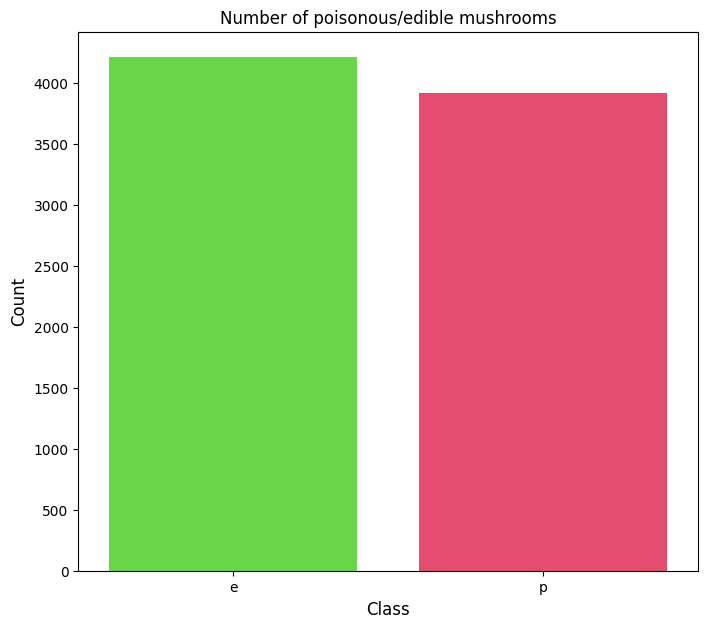

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count = mushroom_df['poisonous'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
# plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

In [ ]:
# =============================================================
# NORMALIZAÇÃO DOS DADOS
# =============================================================
# 3. Manipulando os dados
# Alterar a string "p" para 1 e "e" para 0 na coluna poisonous
mushroom_df["poisonous"] = [1 if i == "p" else 0 for i in mushroom_df["poisonous"]]
## removendo a coluna veil-type nao vai entrar no modelo
# A coluna 'veil-type' possui um único valor em todo o dataset (sem variabilidade), então será removida
mushroom_df.drop("veil-type",axis=1,inplace=True)

In [ ]:
# Codificação das variáveis categóricas para valores numéricos
#Para que a base possa ser utilizada é necessária uma etapa de pré-processamento que substituirá os valores nominais por valores numéricos.
#Os atributos terão seus valores substituídos da seguinte forma: x = 0, b = 0,5 e o = 1.
#Para o atributo alvo, o valor “p” será substituído por 1 e o “e” por 0.
for column in mushroom_df.drop(["poisonous"], axis=1).columns:
    value = 0
    step = 1/(len(mushroom_df[column].unique())-1)
    for i in mushroom_df[column].unique():
        mushroom_df[column] = [value if letter == i else letter for letter in mushroom_df[column]]
        value += step

In [ ]:
#Verificação dos dados :  Todas as colunas agora têm valores float ou inteiros.
data_check = pd.concat([mushroom_df.head(10), mushroom_df.tail()])
data_check

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000,1
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667,0
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333,0
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000,1
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667,0
5,0.0,0.333333,0.111111,0.0,0.125,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.2,0.166667,0
6,0.2,0.000000,0.222222,0.0,0.125,0.0,0.0,1.0,0.181818,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.2,0.333333,0
7,0.2,0.333333,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.0,0.333333,0
8,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.272727,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.6,0.166667,1
9,0.2,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.181818,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.333333,0


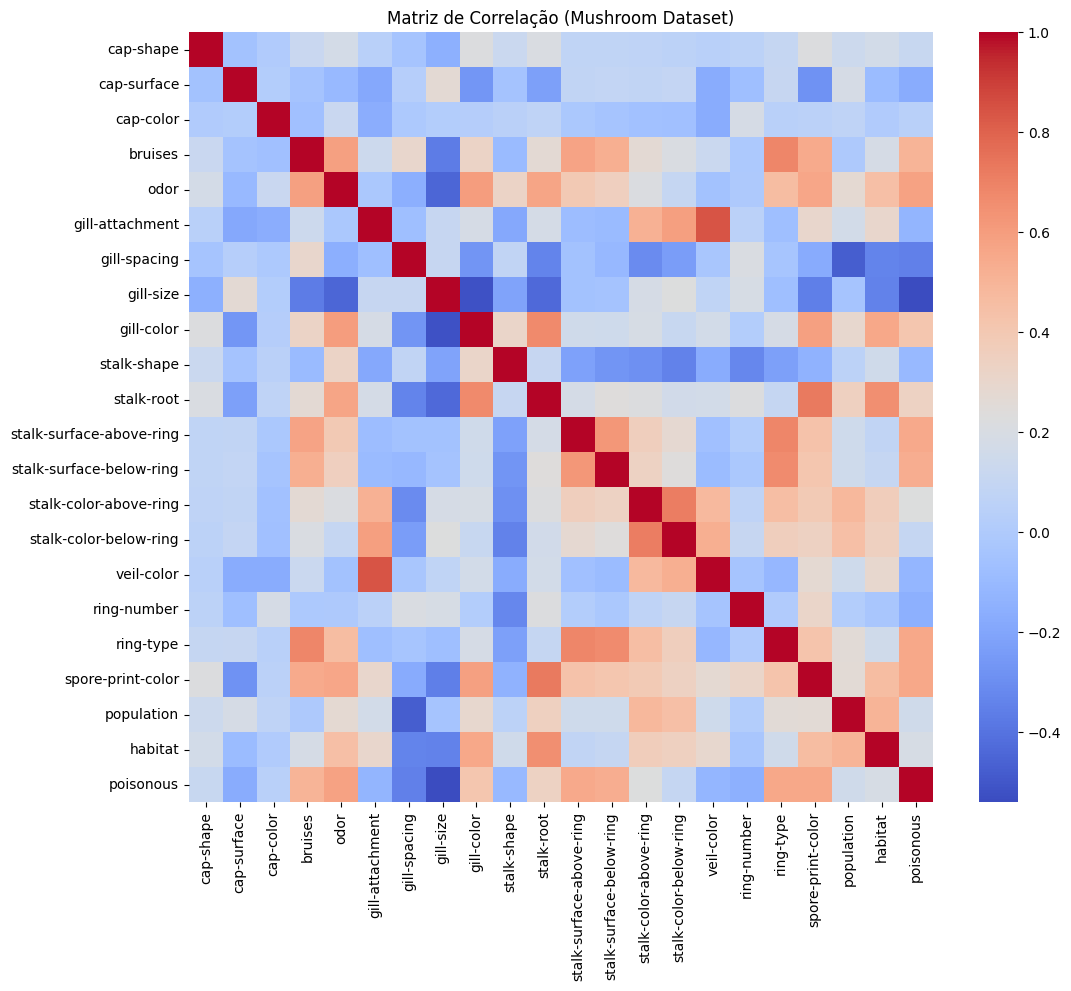

In [ ]:
# =============================================================
# ANÁLISE DE CORRELAÇÃO E REDUÇÃO DE FEATURES
# =============================================================
# Calcular matriz de correlação entre as features
corr_matrix = mushroom_df.corr()
# Plotar matriz de correlação (opcional, visualização)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlação (Mushroom Dataset)")
plt.show()

In [ ]:
# Remover variáveis altamente correlacionadas (redundantes)
# Se a correlação for maior que 0.95, a feature é considerada redundante
threshold = 0.95
to_drop = set()
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            to_drop.add(j)
print(to_drop)
# Criar novo DataFrame com features reduzidas
mushroom_df_reduced = mushroom_df.drop(columns=list(to_drop))

set()


In [ ]:
mushroom_df_reduced

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000,1
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667,0
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333,0
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000,1
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000,0
8120,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,...,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000,0
8121,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,0.0,...,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000,0
8122,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,1.0,...,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000,1


In [ ]:
# =============================================================
# 4. DIVISÃO DOS DADOS
# =============================================================
# Preparando os dados para o algoritmo
# Escolha dos eixos x e y e dividiremos esses dados para treinar ou testar

from sklearn.model_selection import train_test_split
# Separar os dados em variáveis independentes (X) e alvo (y)
y = mushroom_df_reduced["poisonous"].values
x = mushroom_df_reduced.drop(["poisonous"], axis=1).values
# Dividir em conjuntos de treino e teste (80% treino, 20% teste)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2) # Divisão dos dados para treinamento e teste

5- Criação e treinamento do modelo MLP

In [ ]:
# =============================================================
# 3. TREINAR MLP COM DIFERENTES CONFIGURAÇÕES DE 3 CAMADAS
# =============================================================

# Criar modelo de rede neural (MLPClassifier)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Treinar o modelo
mlp.fit(x_train, y_train)

# Gerar as previsões para os exemplos do conjunto de teste (X_test)
y_pred = mlp.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
# 3. Testar diferentes configurações com 3 camadas ocultas
# Definir diferentes arquiteturas de rede com 3 camadas ocultas
# Cada tupla representa (neurônios camada 1, camada 2, camada 3)
camadas = [
    (32, 16, 8),
    (64, 32, 16),
    (128, 64, 32),
    (100, 100, 100)
]
# Loop para treinar e avaliar cada configuração
print("Avaliação de diferentes arquiteturas:")
for config in camadas:
    print(f"\nCamadas ocultas: {config}")
    # Criar o modelo MLP com a arquitetura atual
    mlp = MLPClassifier(hidden_layer_sizes=config, activation='relu', solver='adam', max_iter=1000, random_state=42)
    # Treinar o modelo
    mlp.fit(x_train, y_train)
     # Prever no conjunto de teste
    y_pred = mlp.predict(x_test)

    # Avaliar o desempenho do modelo
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

Avaliação de diferentes arquiteturas:

Camadas ocultas: (32, 16, 8)
Acurácia: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Camadas ocultas: (64, 32, 16)
Acurácia: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Camadas ocultas: (128, 64, 32)
Acurácia: 1.0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00 

In [ ]:
# =============================================================
# 4. AJUSTE DE HIPERPARÂMETROS (GRID SEARCH)
# =============================================================
from sklearn.model_selection import GridSearchCV
# 4. Verificar melhor configuração com GridSearchCV
print("Buscando melhores hiperparâmetros com GridSearchCV: ")
# Definir o grid de hiperparâmetros
param_grid = {
    'hidden_layer_sizes': [(32, 16, 8), (64, 32, 16), (100, 100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Criar o GridSearchCV com validação cruzada
grid = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid,
    cv=10,# validação cruzada com 3 folds
    scoring='accuracy',
    n_jobs=-1 # utilizar todos os núcleos disponíveis
)
# Executar a busca pelos melhores parâmetros
grid.fit(x_train, y_train)
# Exibir os melhores parâmetros encontrados
print("Melhor configuração:", grid.best_params_)
print("Melhor acurácia na validação cruzada: ", grid.best_score_)

Buscando melhores hiperparâmetros com GridSearchCV: 
Melhor configuração: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 16, 8), 'learning_rate': 'constant', 'solver': 'adam'}
Melhor acurácia na validação cruzada:  1.0


In [ ]:
# Avaliar o modelo com a melhor configuração no conjunto de teste
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

print("Avaliação no conjunto de teste: ")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Avaliação no conjunto de teste: 
Acurácia: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
## Verificando as metricas Accuracy, precision  e recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("precision:", precision)
recall = recall_score(y_test, y_pred)
print("recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 1.0
precision: 1.0
recall: 1.0
F1-Score: 1.0


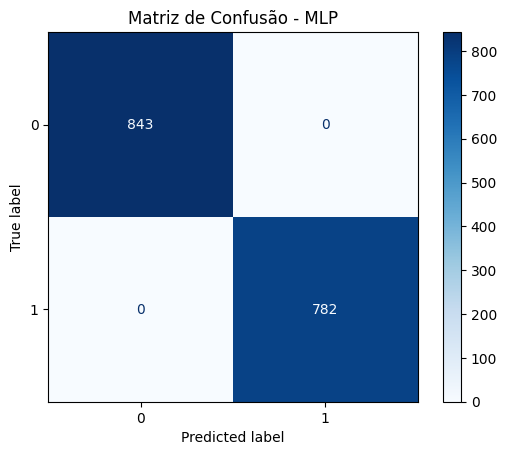

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# 6. Verificando os resultados da classificação com a matriz de confusão
# matriz de confusão  Classificação MLP.
# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - MLP")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

camadas = [
    (32, 16, 8),
    (64, 32, 16),
    (128, 64, 32),
    (100, 100, 100)
]
print("Avaliação de diferentes arquiteturas: ")
for config in camadas:
    print(f"\nCamadas ocultas: {config}")
    mlp = MLPClassifier(hidden_layer_sizes=config, activation='relu', solver='adam', max_iter=1000, random_state=42)
    # knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    # Realiza validação cruzada com 10 folds
    scores = cross_val_score(mlp, x, y, cv=10)
    print(f"config = {config} | Acurácias: {scores} | Média: {np.mean(scores):.4f}")


Avaliação de diferentes arquiteturas: 

Camadas ocultas: (32, 16, 8)
config = (32, 16, 8) | Acurácias: [0.68757688 1.         1.         1.         1.         1.
 1.         1.         0.92118227 1.        ] | Média: 0.9609

Camadas ocultas: (64, 32, 16)
config = (64, 32, 16) | Acurácias: [0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.94334975 1.        ] | Média: 0.9628

Camadas ocultas: (128, 64, 32)
config = (128, 64, 32) | Acurácias: [0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.93842365 1.        ] | Média: 0.9624

Camadas ocultas: (100, 100, 100)
config = (100, 100, 100) | Acurácias: [0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.94950739 1.        ] | Média: 0.9635


Camadas ocultas	Média da Acurácia:

(32, 16, 8)	0.9609 (96,09%)

(64, 32, 16)	0.9628 (96,28%)

(128, 64, 32)	0.9624 (96,24%)

(100, 100, 100)	0.9635 (96,35%)  - **Melhor**.

A arquitetura (100, 100, 100) apresentou o melhor desempenho médio entre as opções testadas, com uma boa estabilidade (valores próximos de 1.0 na maioria das execuções), sendo a mais indicada com base nos dados fornecidos.